### Portfolio assignment 12
30 min: Perform a bivariate analysis on at least 3 combinations of a numerical column with a categorical column in the dataset that you chose in portfolio assignment 4. Use <em>.groupby('columnname').mean()</em> to calculate the means. Is there a difference between categories? Then use seaborn barplots to check if there is a statistically significant difference. 

In [1]:
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,LifeExpectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# In this data set there are 2 categorical columns. Country and Status.

In [2]:
df.groupby('Status').mean()

,Year,LifeExpectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Status,,,,,,,,,,,,,,,,,,,,
Developed,2007.500000,79.197852,79.685547,1.494141,9.826736,2703.600380,88.041298,499.005859,51.803906,1.810547,93.736328,7.554042,93.476562,0.100000,22053.386446,6.830053e+06,1.320703,1.296680,0.852489,15.845474
Developing,2007.522671,67.111465,182.833195,36.384171,3.484119,323.470285,79.763930,2824.926216,35.435326,50.525144,80.170752,5.590694,79.951807,2.088664,4286.556053,1.407108e+07,5.592935,5.635242,0.582310,11.219256


In [3]:
df.groupby('Country').mean()

,Year,LifeExpectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,2007.5,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,2007.5,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,2007.5,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,2007.5,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,2007.5,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2007.5,73.38750,163.0000,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,10.7500,74.6875,4.998667,68.5000,0.10000,NaN,NaN,1.65000,1.56250,0.726812,12.78750
Viet Nam,2007.5,74.77500,126.5625,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,36.5000,94.9375,5.977333,91.7500,0.14375,NaN,NaN,14.92500,15.62500,0.627062,11.51250
Yemen,2007.5,63.86250,211.8125,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,51.6250,67.1250,5.005333,72.6250,0.10000,NaN,NaN,13.83125,13.75000,0.475500,8.50625


# Lets analyse some barplots..

<AxesSubplot:xlabel='Status', ylabel='Adult Mortality'>

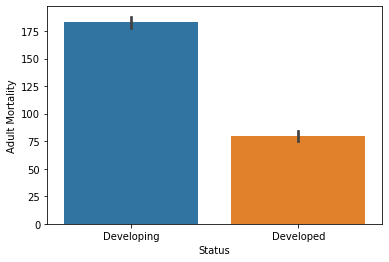

In [4]:
sns.barplot(y='Adult Mortality', x='Status', data=df)

<AxesSubplot:xlabel='Status', ylabel='Alcohol'>

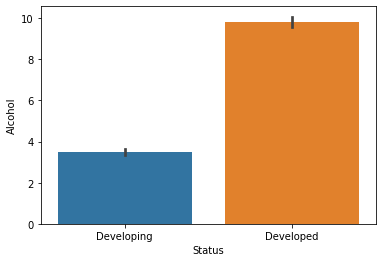

In [5]:
sns.barplot(y='Alcohol', x='Status', data=df)

### Adult mortality in developing countries is far higher, while alcohol is a lot higher in developed countries.
#### Is there a corrolation between alcohol and schooling? 

<AxesSubplot:xlabel='Status', ylabel='Schooling'>

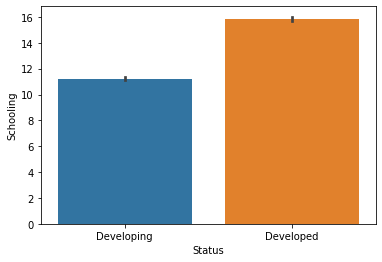

In [6]:
sns.barplot(y='Schooling', x='Status', data=df)


<AxesSubplot:xlabel='Status', ylabel='GDP'>

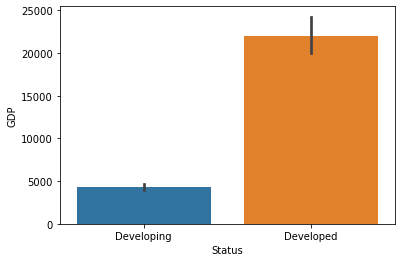

In [7]:
sns.barplot(y='GDP', x='Status', data=df)

<AxesSubplot:xlabel='Status', ylabel='Population'>

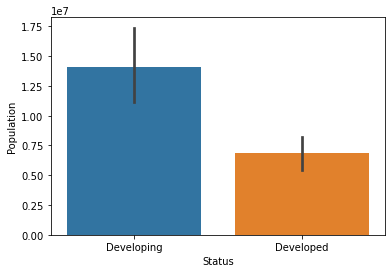

In [8]:
sns.barplot(y='Population', x='Status', data=df)

### For bivariate analasys on country, we need to do some finessing on the dataframe and the barplot visuals, otherwise the data set will be too large and not readable

In [9]:
sns.set(rc={'figure.figsize':(55,35)})
sns.set(font_scale = 2)

#### Let's show the top 30 countries 

<AxesSubplot:xlabel='Country', ylabel='Adult Mortality'>

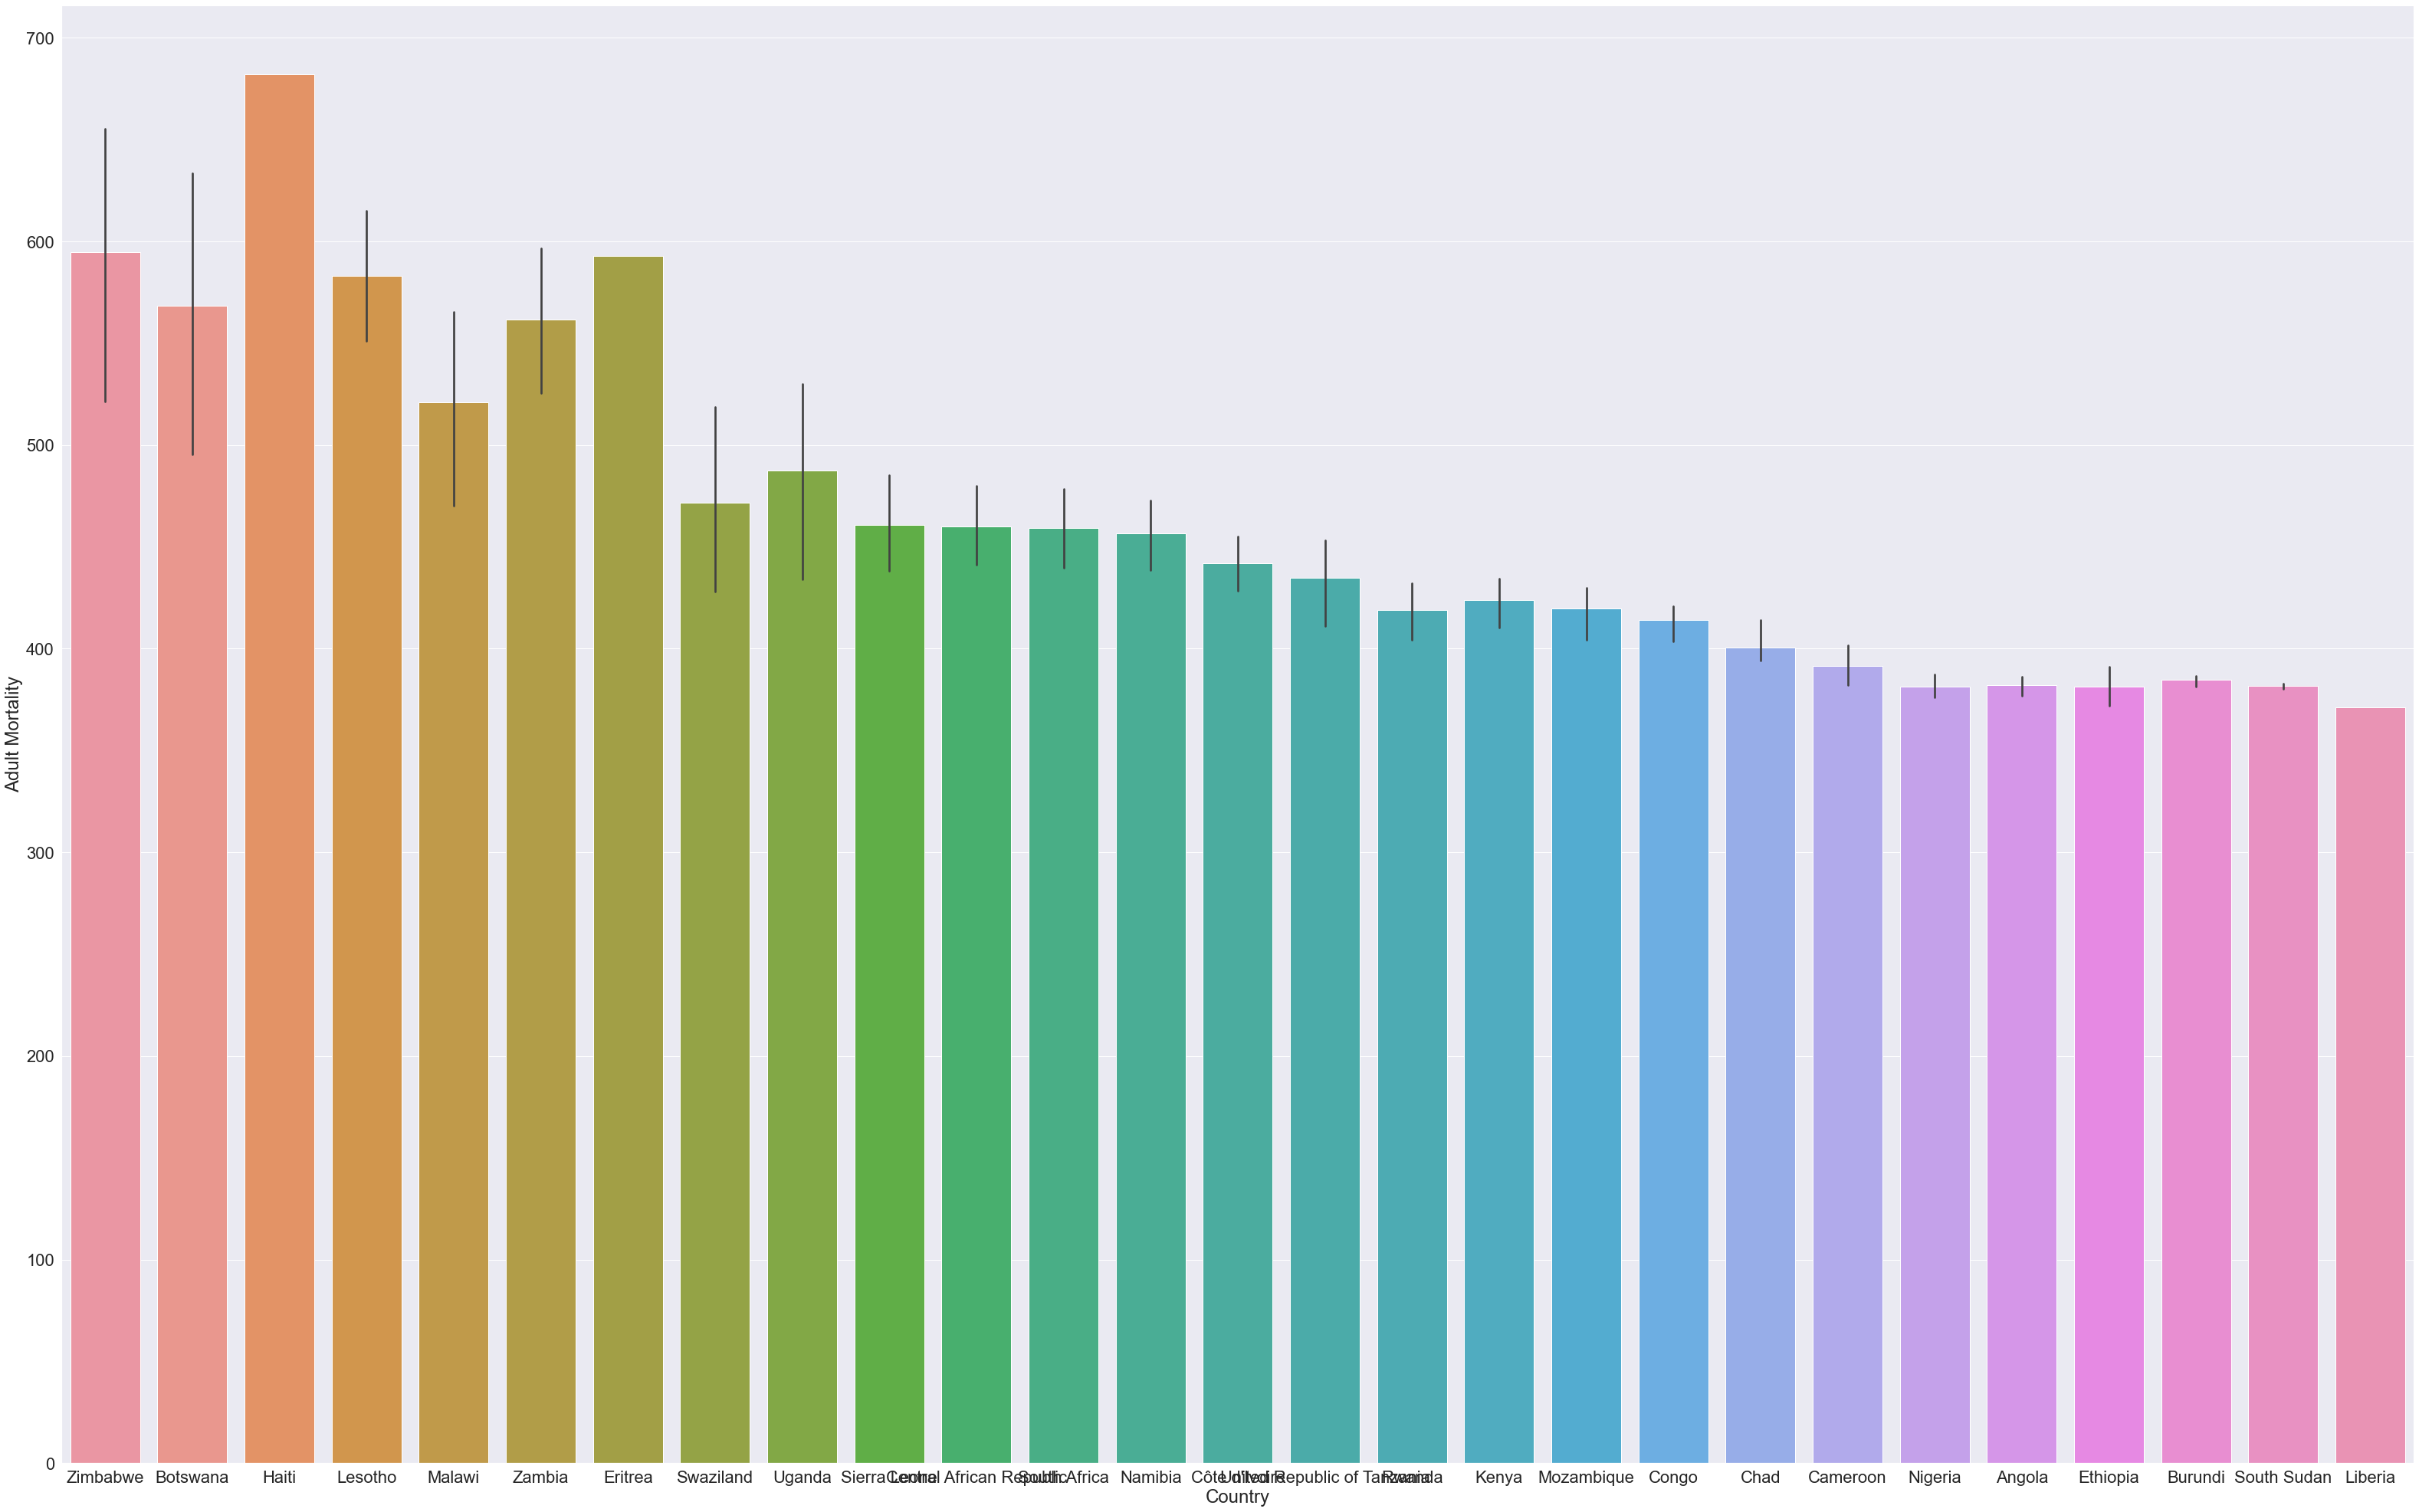

In [10]:
sns.barplot(y='Adult Mortality', x='Country', data=df.sort_values('Adult Mortality',ascending=False).head(200))

<AxesSubplot:xlabel='Country', ylabel='Schooling'>

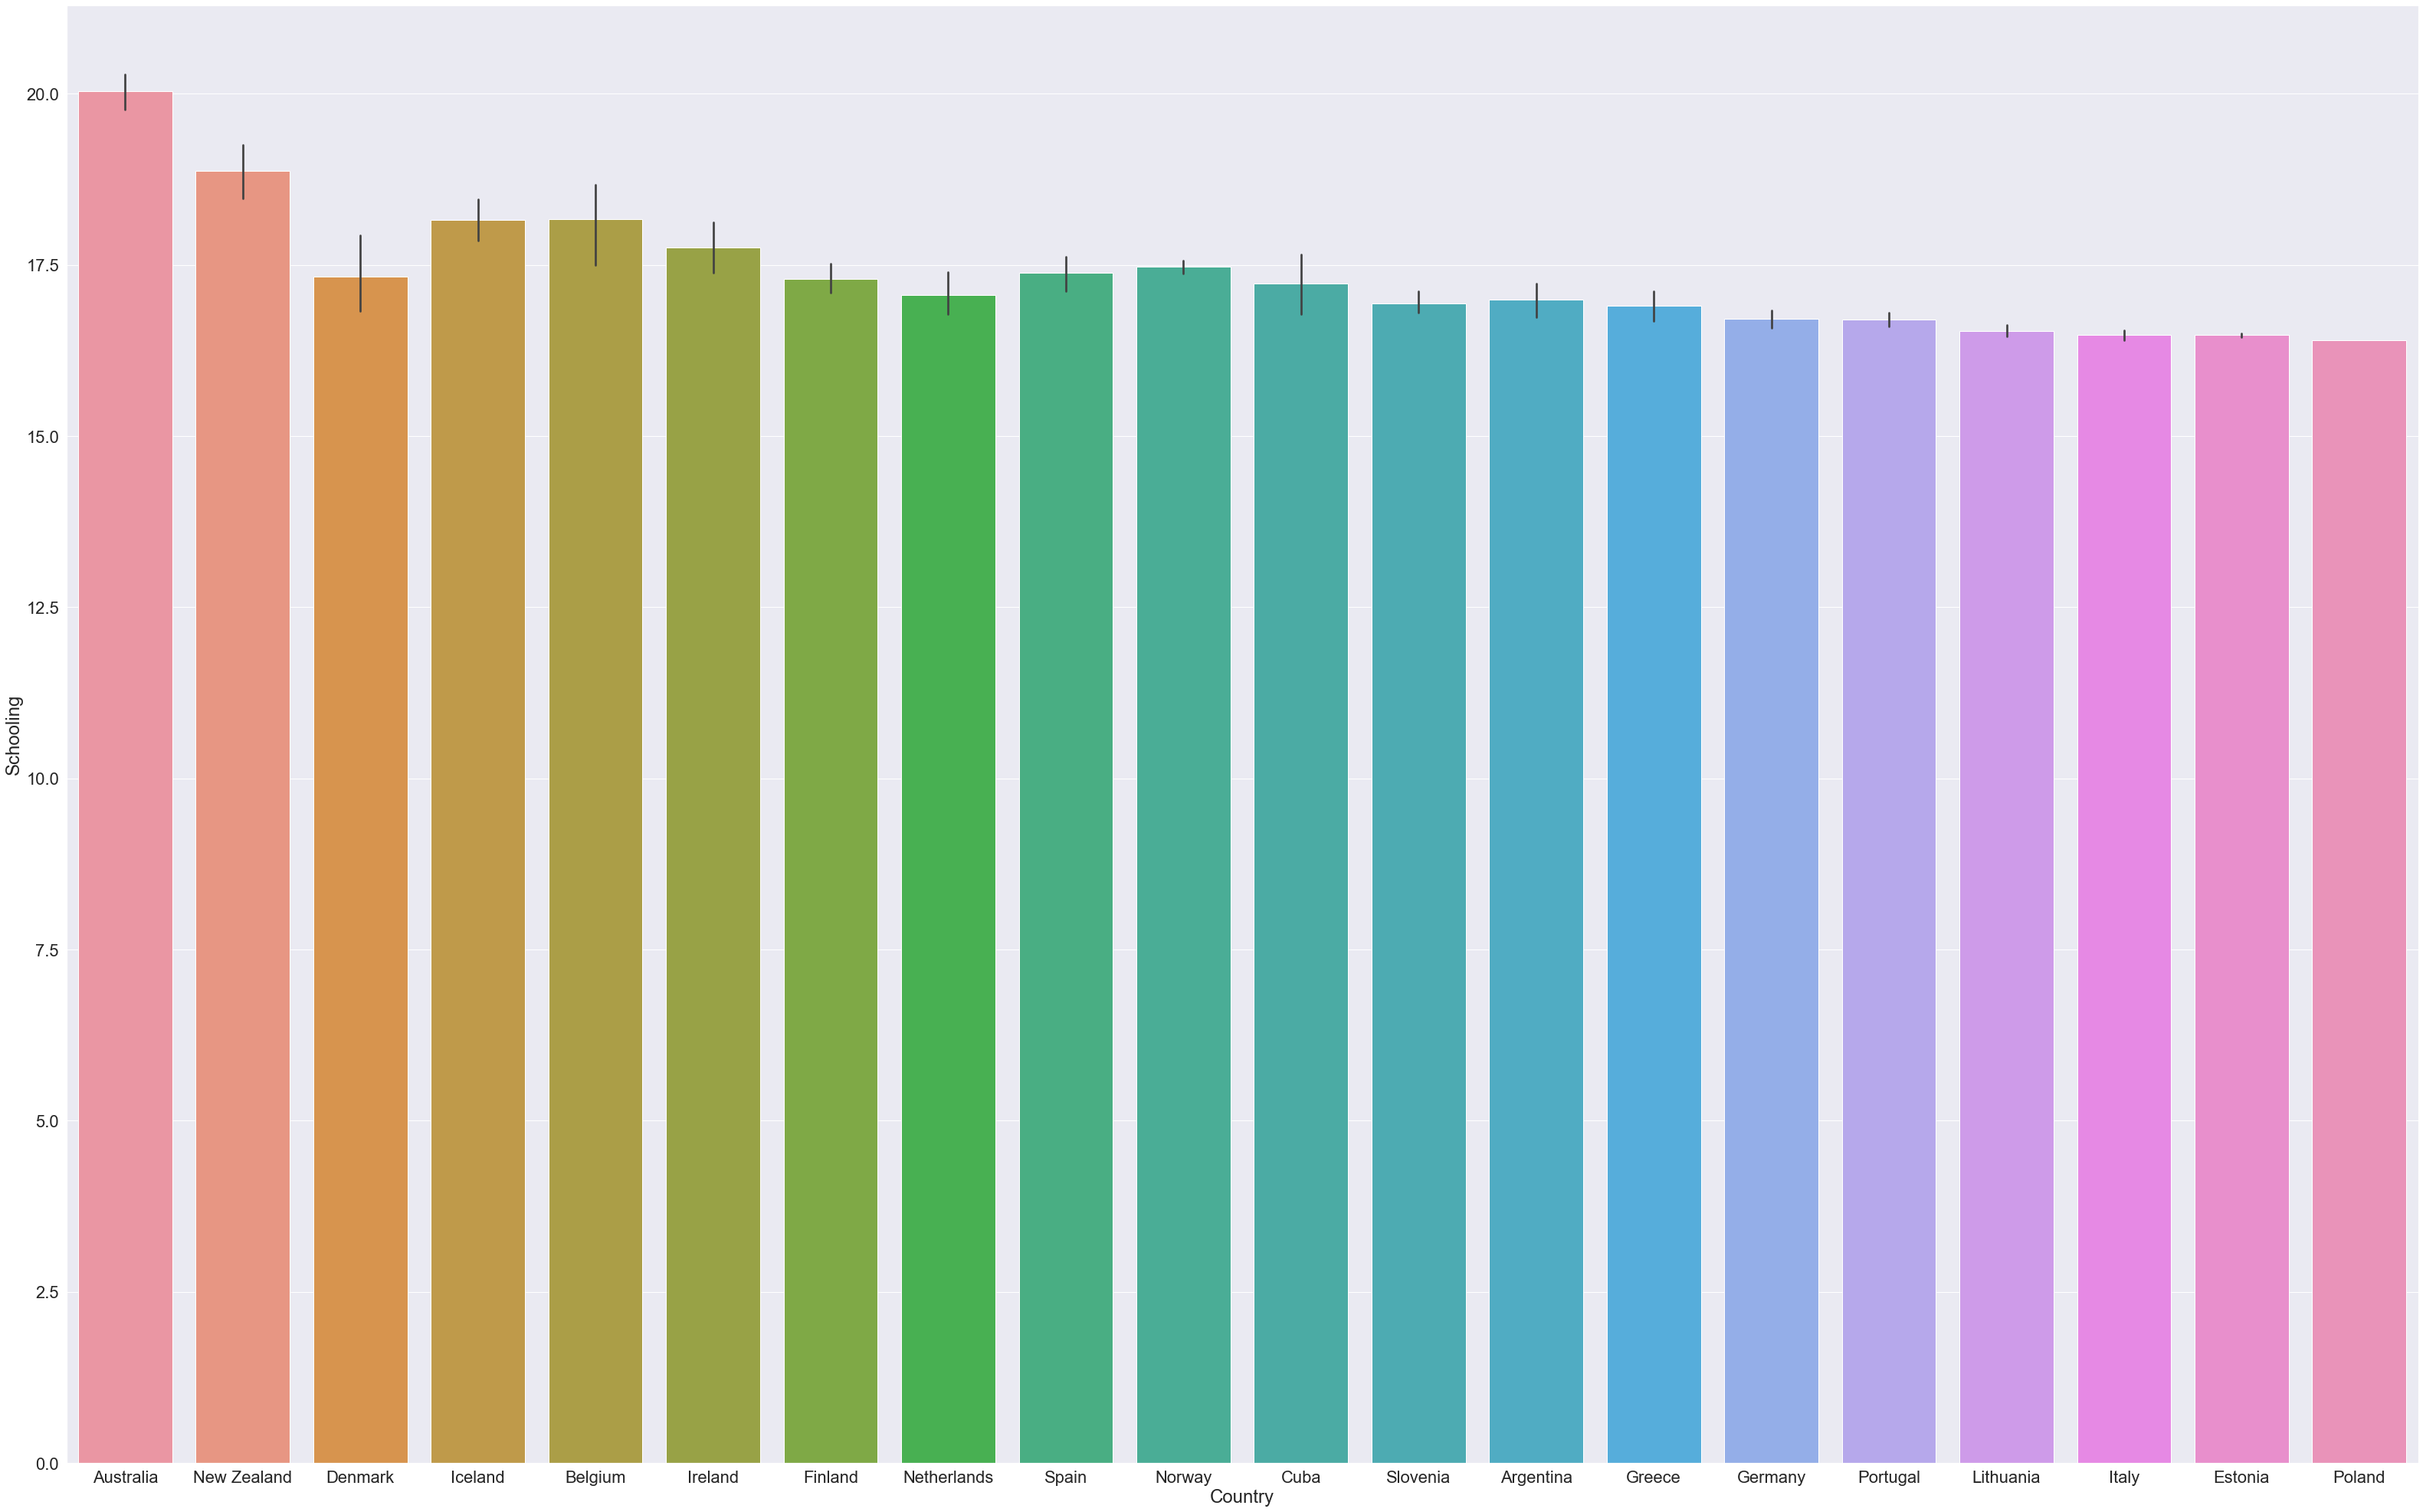

In [11]:
sns.barplot(y='Schooling', x='Country', data=df.sort_values('Schooling',ascending=False).head(200))

<AxesSubplot:xlabel='Country', ylabel='GDP'>

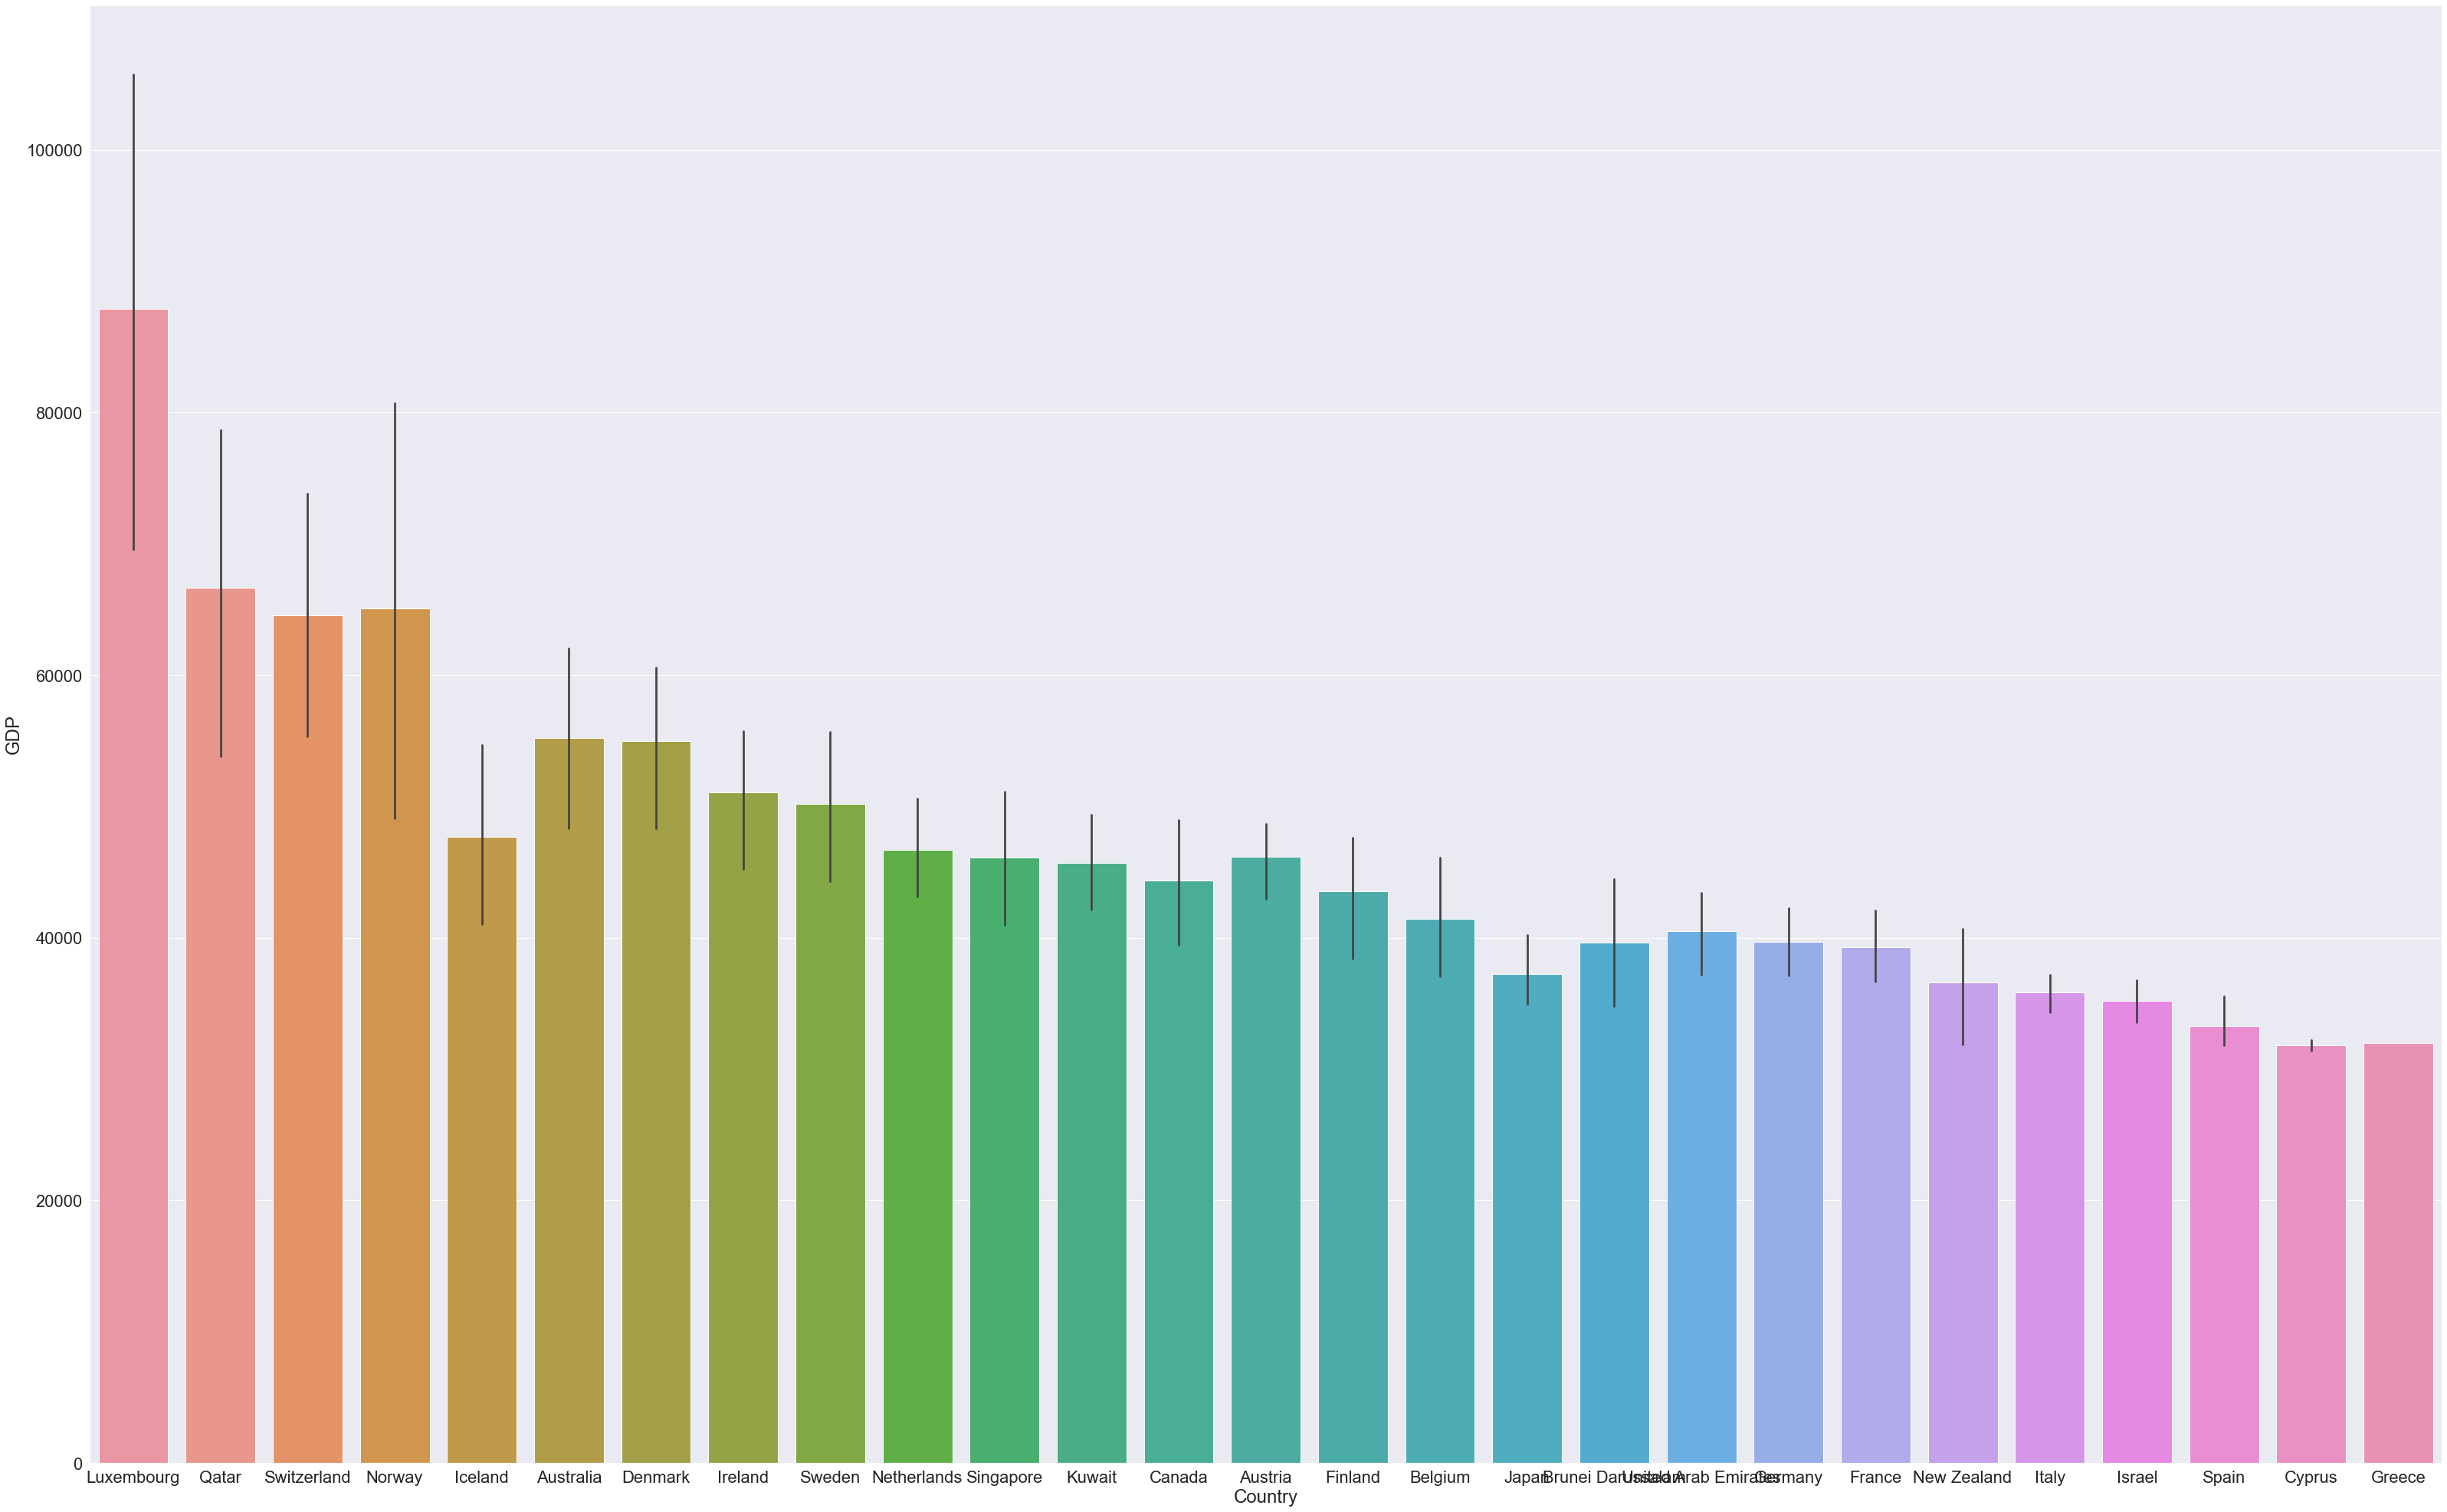

In [12]:
sns.barplot(y='GDP', x='Country', data=df.sort_values('GDP',ascending=False).head(200))

<AxesSubplot:xlabel='Country', ylabel='Alcohol'>

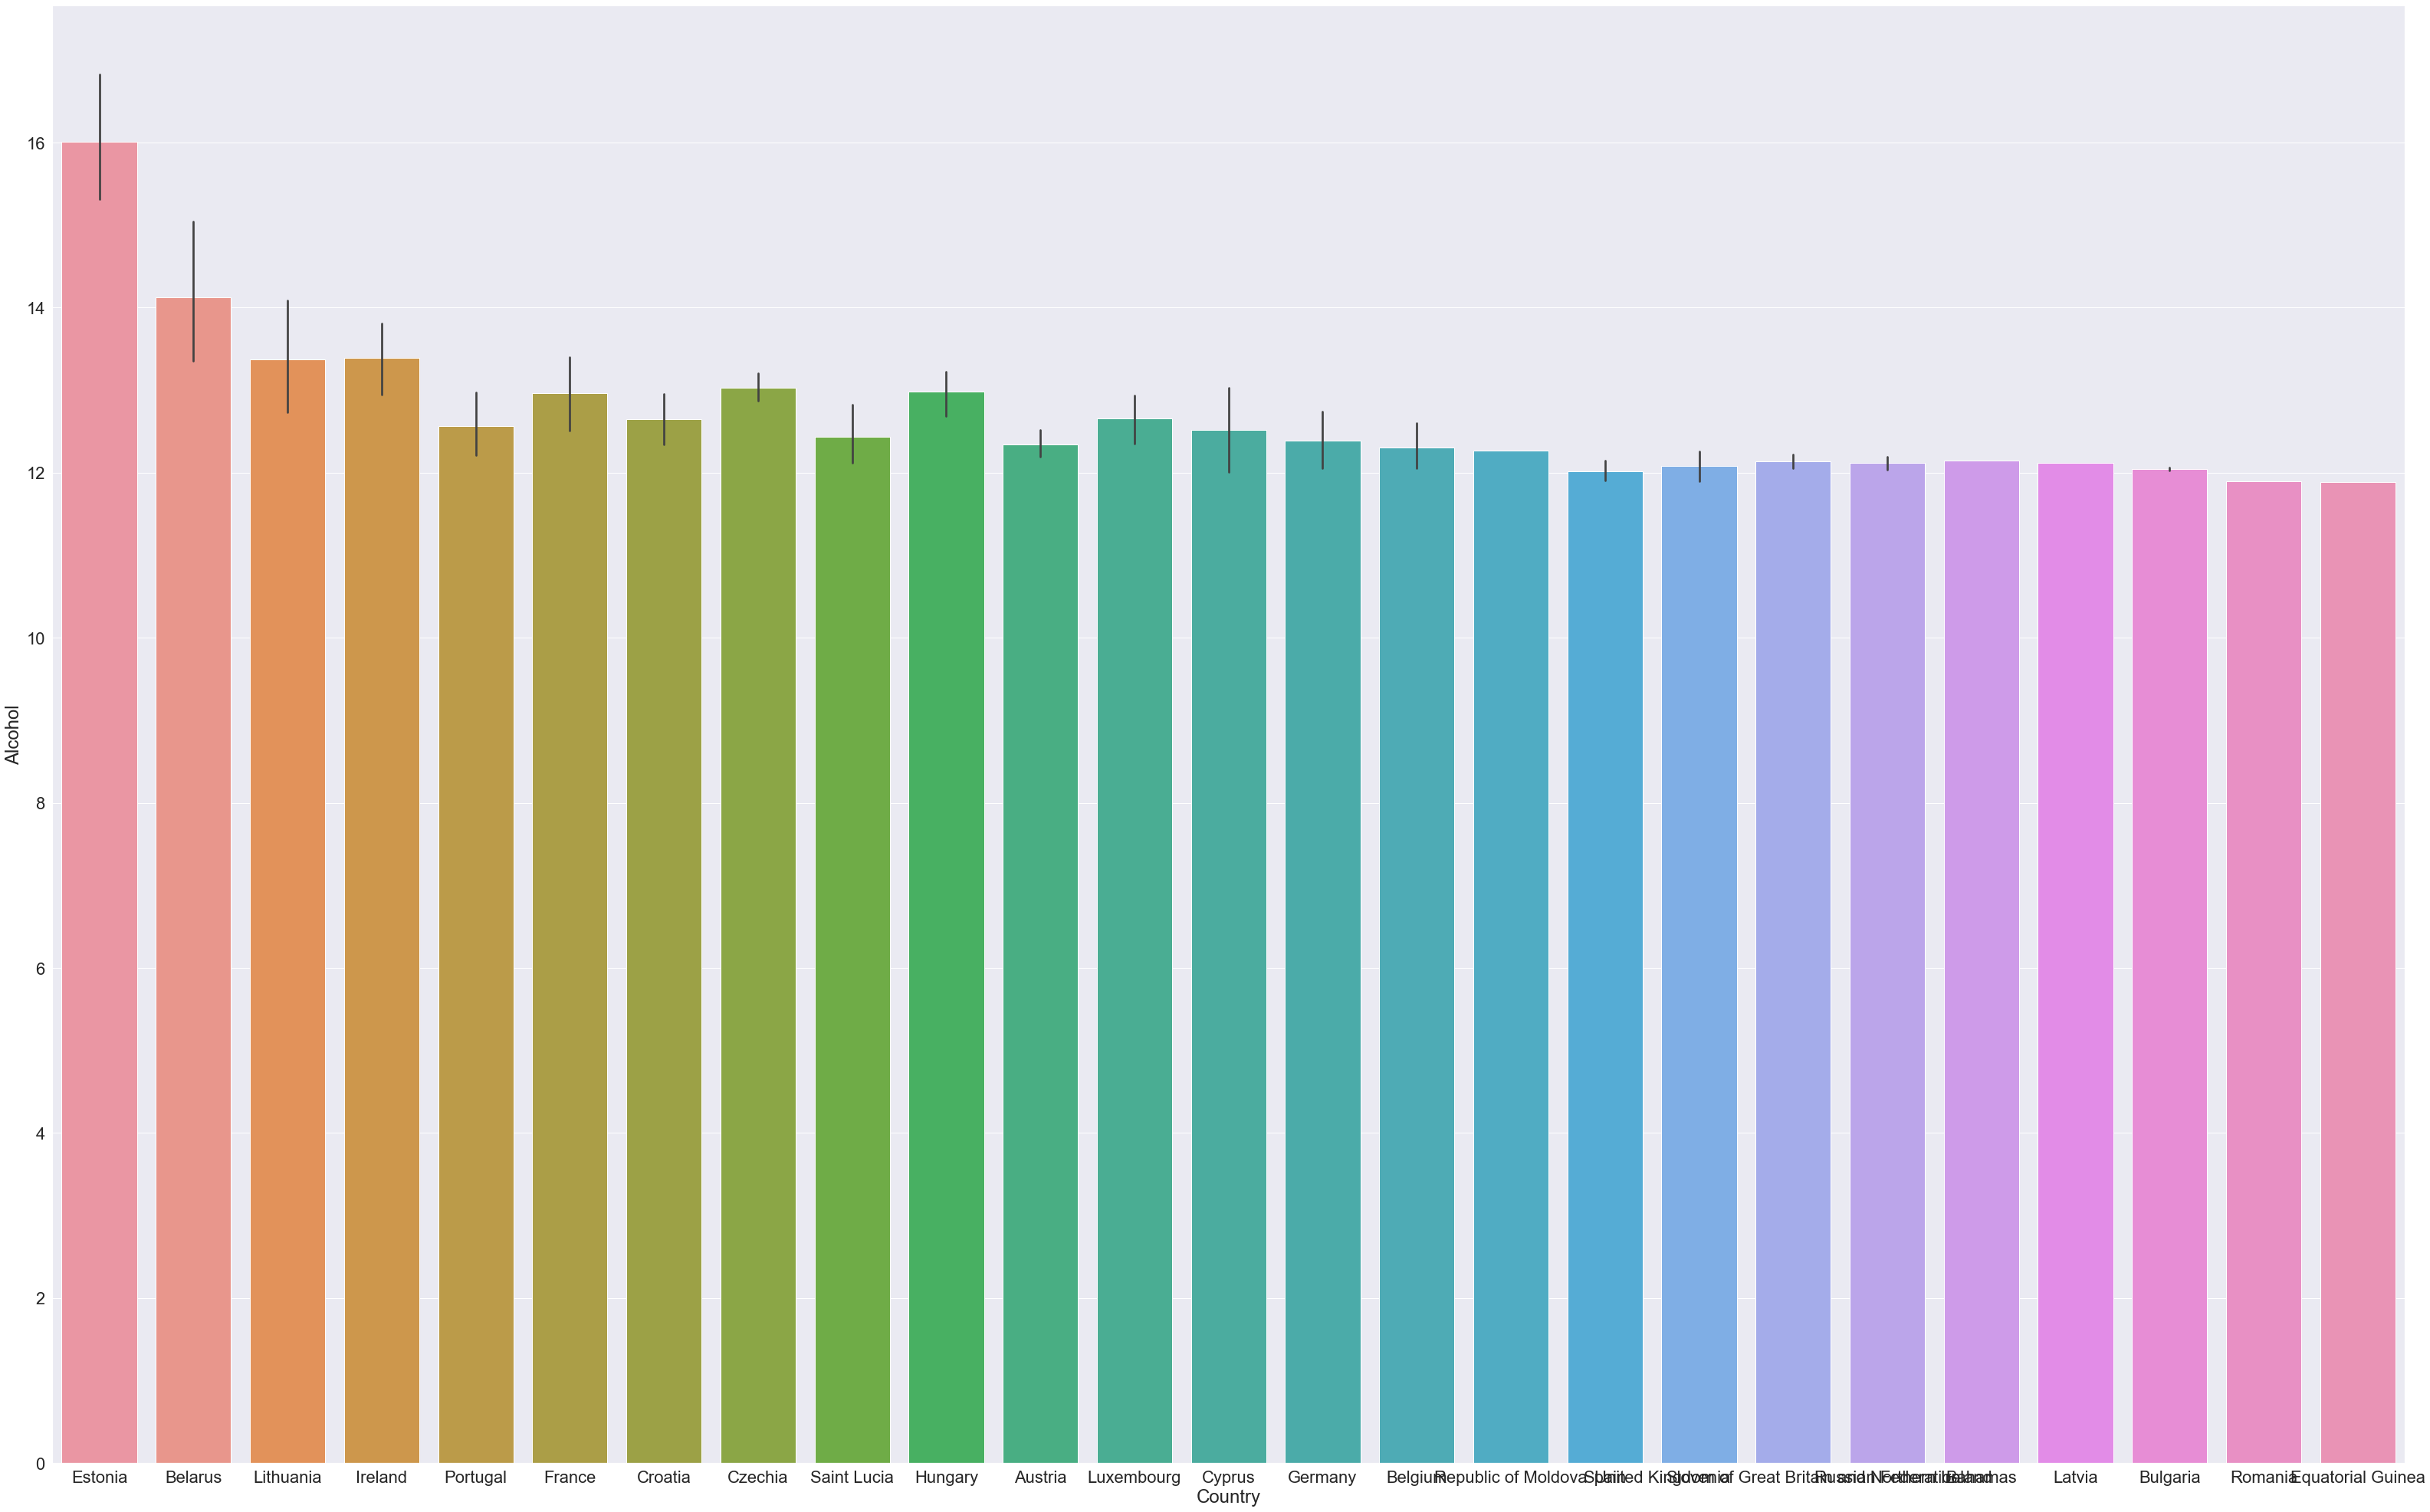

In [13]:
sns.barplot(y='Alcohol', x='Country', data=df.sort_values('Alcohol',ascending=False).head(150))

## Final thoughts:
### It is obvious that there are a lot of differences between the categories, and there are also a lot of correlations between them as well.
### For example the Netherlands rank top 10 in both GDP and schooling, but are also up there on the alcohol scales.